In [1]:
import pandas as pd
import numpy as np

read it https://developers.google.com/machine-learning/crash-course/linear-regression

Today you and I will be using the Automobile Data Set (https://archive.ics.uci.edu/ml/datasets/Automobile).

This dataset is quite good and diverse; it contains categorical, integer and real-valued attributes. Also, as part of the target variable, the dataset involves solving a regression problem, which is exactly what we wanted to realize today.

In [2]:
columns = ["symboling",
 "normalized-losses",
 "make",
 "fuel-type",
 "aspiration",
 "num-of-doors",
 "body-style",
 "drive-wheels",
 "engine-location",
 "wheel-base",
 "length",
 "width",
 "height",
 "curb-weight",
 "engine-type",
 "num-of-cylinders",
 "engine-size",
 "fuel-system",
 "bore",
 "stroke",
 "compression-ratio",
 "horsepower",
 "peak-rpm",
 "city-mpg",
 "highway-mpg",
 "price"]

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header=None, names=columns)

In [4]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Data preparation

First, let's do some preliminary data preparation: look at our data, find gaps, and encode features. Just like we discussed in the module on EDA!

### Gaps Detection

Let's see how many gaps there are in our data.

In [5]:
df.isna().sum().sum()

0

Something strange... The website says there are gaps!

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


If you look closely, you can see that gaps in the data are marked, apparently, with a special sign “?”. Let's calculate how many such signs are present in the data.


In [7]:
(df == '?').sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
df.shape

(205, 26)

Notable history!

Let's get rid of these question marks and bring everything to the standard and familiar `np.nan` using the `replace` method.

In [9]:
df = df.replace({'?':np.nan})

In [10]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
df.isna().sum().sum()

59

### Data type conversions

Since those features used to contain question marks, and since pandas is designed so that if at least one value in a column is a string, the entire column is immediately labeled with the `object` type - with this in mind, we now have true numeric features labeled ostensibly as categorical.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

article(how to convert https://www.geeksforgeeks.org/pandas/change-data-type-for-one-or-more-columns-in-pandas-dataframe/)

In [13]:
df['normalized-losses'] = df['normalized-losses'].apply(pd.to_numeric)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [15]:
df['bore'] = df['bore'].apply(pd.to_numeric)

df['stroke'] = df['stroke'].apply(pd.to_numeric)
df['horsepower'] = df['horsepower'].apply(pd.to_numeric)

df['peak-rpm'] = df['peak-rpm'].apply(pd.to_numeric)
df['price'] = df['price'].apply(pd.to_numeric)



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Let's now look at features with fewer than 10 unique values. Are all of them actually fully categorical?

In [17]:
for col in df.columns:
    count_c = df[col].nunique()
    if count_c <= 10:
        print(col, count_c)

symboling 6
fuel-type 2
aspiration 2
num-of-doors 2
body-style 5
drive-wheels 3
engine-location 2
engine-type 7
num-of-cylinders 7
fuel-system 8


or

In [18]:
df.nunique()[df.nunique() < 10].index

Index(['symboling', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

Those columns that can be explicitly converted to numbers (e.g. if the columns have numbers written in letters) should indeed be transformed and converted to numeric type. The replace method will again help us in this.

In [19]:
df['num-of-doors']= df['num-of-doors'].replace(to_replace=['four'], value = 4)

In [20]:
df['num-of-doors']= df['num-of-doors'].replace(to_replace=['two'], value = 2)

In [21]:
df['num-of-cylinders'] = df['num-of-cylinders'].replace(to_replace=['eight'], value = 8)

df['num-of-cylinders'] = df['num-of-cylinders'].replace(to_replace=['five'], value = 5)

df['num-of-cylinders'] = df['num-of-cylinders'].replace(to_replace=['four'], value = 4)

df['num-of-cylinders'] = df['num-of-cylinders'].replace(to_replace=['six'], value = 6)

df['num-of-cylinders'] = df['num-of-cylinders'].replace(to_replace=['three'], value = 3)

df['num-of-cylinders'] = df['num-of-cylinders'].replace(to_replace=['twelve'], value = 12)

df['num-of-cylinders'] = df['num-of-cylinders'].replace(to_replace=['two'], value = 2)

or

In [22]:
str_num_cols = ["num-of-doors", "num-of-cylinders"]
df[str_num_cols] = df[str_num_cols].replace({'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'twelve': 12})

Let's make sure we got it right.

In [23]:
df["num-of-doors"].unique()

array([ 2.,  4., nan])

In [24]:
df['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

### Categorical attributes

Let's look at those attributes that are still defined as `object` type in our dataframe.

In [26]:
df.select_dtypes(include = ['object']).columns

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

This seems reasonable enough. In the sense that these attributes do seem to be categorical and require further work as with classical categorical columns.

But before we proceed to work with them, let's take a closer look at the `make` column. What does it represent?

In [27]:
df['make'].head(20)

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
Name: make, dtype: object

Why do you think I emphasized this column in particular?

#### Assumption #1

So, at this point in our notebook, one of the key divergences occurs. We will make a certain assumption with you and continue our work considering it, in order to build a baseline for our task later. (By the way, can you remind me what a baseline is?)

However, later on, when you will be working on improving the quality of the algorithm, it is recommended to find this block with the assumption (as well as other assumption blocks) using the navigator and apply a more advanced approach instead of the one we are initially trying.

If done correctly, you will be able to compare the results before and after, which is extremely useful and indicative — especially at the stage of initial immersion in machine learning.

Baseline

A model used as a reference point for comparing how well another model (typically, a more complex one) is performing. For example, a logistic regression model might serve as a good baseline for a deep model.

For a particular problem, the baseline helps model developers quantify the minimal expected performance that a new model must achieve for the new model to be useful.

https://developers.google.com/machine-learning/glossary#linear-regression

What's the scary assumption we're going to make? Let's just remove all categorical columns for now, instead of transforming them in some way.

Separately, let us also note the removal of the `make` column we mentioned earlier.

In [28]:
df = df.drop(columns=['symboling', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'])

In [29]:
df

,normalized-losses,make,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,alfa-romero,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,alfa-romero,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,alfa-romero,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,audi,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,audi,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,4.0,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,95.0,volvo,4.0,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,95.0,volvo,4.0,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,95.0,volvo,4.0,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   make               205 non-null    object 
 2   num-of-doors       203 non-null    float64
 3   wheel-base         205 non-null    float64
 4   length             205 non-null    float64
 5   width              205 non-null    float64
 6   height             205 non-null    float64
 7   curb-weight        205 non-null    int64  
 8   num-of-cylinders   205 non-null    int64  
 9   engine-size        205 non-null    int64  
 10  bore               201 non-null    float64
 11  stroke             201 non-null    float64
 12  compression-ratio  205 non-null    float64
 13  horsepower         203 non-null    float64
 14  peak-rpm           203 non-null    float64
 15  city-mpg           205 non-null    int64  
 16  highway-mpg        205 non

Well - you can see that there are no more categorical features left!

For the future, you may find the following code for applying OHE useful (if you modify the program in place of Assumption #1):

    df = pd.get_dummies(
        df,
        columns=['symboling', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'],
        drop_first=True
    )

    df = pd.get_dummies(
        df,
        columns=['make'],
        drop_first=True
    )

### Handling gaps

So, we've dealt with the categorical attributes - what's left is to deal with the gaps: they are still present in our data.

Let's make sure of it, by the way!

In [31]:
df.isna().any()

normalized-losses     True
make                 False
num-of-doors          True
wheel-base           False
length               False
width                False
height               False
curb-weight          False
num-of-cylinders     False
engine-size          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

#### Assumption #2

And here comes our second assumption (which we will make with all the same caveats and orders of magnitude as the first). We propose that all gaps in the current stage simply be filled in with the mean.

Understandably, not the most intelligent way to do it. But that's why it is an assumption, to have a good subsequent layer of work to further improve the quality of your algorithm.

In [32]:
df.fillna(df.mean(), inplace = True)

/var/folders/f6/y0jst_bn3m76k2ldjxy747_80000gn/T/ipykernel_1769/2622515659.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [33]:
df.isna().any()

normalized-losses    False
make                 False
num-of-doors         False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
num-of-cylinders     False
engine-size          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

## Machine Learning

Now that we've finally completed the long and tiring EDA phase (which, as you probably realize, we're still only at the top of our game, actually - to the question, by the way, of how much time a Data Scientist spends doing initial preprocessing and how much time actually doing algorithm and model development) - anyway, now that this phase is behind us - we're fully ready to move on to machine learning!

And accordingly, the first question is: when we move to machine learning, what in the beginning should we immediately implement?

That's right - split into train and test!

### Self-solving task (splitting a sample into train and test)

Split the df dataframe into training and test samples using the `train_test_split` function from the `sklearn.model_selection` module.

Set the proportion of the test sample as 20%. Set the `random_state` value to 13.

In [34]:
df = df.drop(columns=['make'])

In [35]:
df.head(5)

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,122.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,122.0,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [64]:
X = df.drop('price', axis=1)
y = df['price']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 13)

In [66]:
X_train

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
111,161.0,4.0,107.9,186.7,68.4,56.7,3075,4,120,3.46,2.19,8.4,95.0,5000.0,19,24
96,122.0,4.0,94.5,165.3,63.8,54.5,1971,4,97,3.15,3.29,9.4,69.0,5200.0,31,37
151,87.0,2.0,95.7,158.7,63.6,54.5,2040,4,92,3.05,3.03,9.0,62.0,4800.0,31,38
158,91.0,4.0,95.7,166.3,64.4,53.0,2275,4,110,3.27,3.35,22.5,56.0,4500.0,34,36
97,103.0,4.0,94.5,170.2,63.8,53.5,2037,4,97,3.15,3.29,9.4,69.0,5200.0,31,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,168.0,2.0,95.1,162.4,63.8,53.3,2008,4,97,3.15,3.29,9.4,69.0,5200.0,31,37
16,122.0,2.0,103.5,193.8,67.9,53.7,3380,6,209,3.62,3.39,8.0,182.0,5400.0,16,22
74,122.0,2.0,112.0,199.2,72.0,55.4,3715,8,304,3.80,3.35,8.0,184.0,4500.0,14,16
176,65.0,4.0,102.4,175.6,66.5,54.9,2414,4,122,3.31,3.54,8.7,92.0,4200.0,27,32


## K-Nearest Neighbors

The KNN algorithm is one of the simplest machine learning algorithms. Although it often fails to solve the problem at hand with adequate quality, it is frequently used as a preparatory filter for objects that will subsequently be checked by more complex models (or, in other words, as a baseline).

Another advantage of this algorithm is its interpretability. That is, we can easily (especially compared to many other algorithms) analyze why our model made a particular decision.

At the same time, the algorithm has a number of limitations for the data, which we will discuss in the statement below.

### Problem Statement

Suppose we have data recorded in a familiar way, as a feature matrix of size $M \times N$, where $M$ is the number of objects and $N$ is the number of features.

Let's assume that all $N$ features are in the same metric space. If so, each of the $M$ objects is simply a point in an $N$-dimensional metric space, which means we can calculate the distance between any two points.

Then, if we select any point, we can determine which of the $M-1$ remaining points is the closest to the one considered—such a point is called the nearest neighbor.

Similarly, we can define the second closest neighbor, and so on.

Furthermore, since we have assumed that our space is metric, we can assert that points which are close to each other in terms of distance are likely to be similar, while those that are far apart will be dissimilar.

This means that the KNN algorithm is justified and applicable!

When using the KNN algorithm, there is no “learning” as such. The only thing you need to do, in fact, is to “memorize” for the points their location in space, as well as their targets.

### Implementation of kNN

The main adjustable parameter of the algorithm (i.e., the hyperparameter) is, of course, the number of nearest neighbors (`k`). In practice, for many tasks, there is often a clearly defined optimal value for this parameter—meaning that any value less than or greater than it will result in worse outcomes.

You can view the complete list of hyperparameters, including various modifications of KNN, on [library page](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

#### Self-solving task (KNN training)

Train the KNN model by importing it from the `sklearn.neighbors` module. Use the standard machine learning model interface from the `sklearn` library for training.

When training, use the number of neighbors equal to three, and set the Manhattan distance metric.


In [67]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors = 3)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

In [68]:
pd.DataFrame(y_pred)

,0
0,16398.666667
1,6588.000000
2,8041.333333
3,9214.000000
4,10960.666667
5,6588.000000
6,13681.000000
7,23542.666667
8,7239.666667
9,14979.666667


Great! We were able to train the machine learning model on the data and got predictions for the test.

Now the most important question is: what kind of model did we get: good, average, bad? How do we even know that?

### Model Quality Metrics

Various metrics, called quality metrics, are used to evaluate how well a model performs on a given task.

In regression problems, the quality of the chosen solution is often assessed by how much the algorithm gets wrong on the lagged data. Thus, for example, one often looks at:

* Mean Squared Error (MSE): $\frac{1}{n}\sum\limits_i^n(\widetilde{y}_i - y_i)^2$
* Mean Absolute Error (MAE): $\frac{1}{n}\sum\limits_i^n|\widetilde{y}_i - y_i|$
* Max Error: $\max\limits_i |\widetilde{y}_i - y_i|$

where $\widetilde{y}$ — predicted value, $y$ — real value.

In [41]:
x+=2

NameError: name 'x' is not defined

In [42]:
x+=3

NameError: name 'x' is not defined

In [43]:
x

NameError: name 'x' is not defined

In [44]:
sds +=4

NameError: name 'sds' is not defined

#### Self-solving task (regression quality metrics)

Write lambda functions that take as input $\widetilde{y}$, $y$ and calculate the values of the quality metrics above.

In [44]:
pd.DataFrame(y_test)

,price
104,17199.0
90,7099.0
23,7957.0
143,9960.0
171,11549.0
150,5348.0
65,18280.0
114,17075.0
33,6529.0
101,13499.0


In [46]:
y_ar = np.array(y_pred)
y_ba = np.array(y_test)
print(y_ar - y_ba)

[ -274.           -11.66666667    20.            69.33333333
  -165.          -193.33333333   116.66666667  -333.33333333
   104.66666667  -125.29021559   158.33333333    28.
  1387.33333333   191.            25.33333333   169.66666667
    -2.33333333   -75.33333333   -54.           -14.33333333
  -114.            71.33333333 -2150.33333333   -48.33333333
  -884.66666667   -45.66666667  -105.33333333  -471.33333333
  -267.66666667  -247.            36.           -59.33333333
   -62.          -118.66666667    45.           115.33333333
   536.66666667  -182.33333333   224.66666667    80.33333333
  -277.33333333]


def mse(y_1, y_2):
    y_1 = np.array(y_1)
    y_2 = np.array(y_2)
    return (1/(len(y_1))) * np.sum((y_1 - y_2)**2)

mse(y_pred, y_test)

In [47]:
def mae (y_1, y_2):
    return np.mean(np.abs(y_1 - y_2))
mae (y_pred, y_test)
    

235.66561501435913

In [48]:
def max_er(y_1, y_2):
    return np.max(np.abs(y_1-y_2))
max_er(y_pred, y_test)

2150.333333333332

In [49]:
print('Rmse', (mse(y_pred, y_test))**0.5)

NameError: name 'mse' is not defined

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))

print('Max Error', max_error(y_test,y_pred))

MSE:  21920363.387533873
MAE:  2832.8617886178868
Max Error 16655.333333333332


There's still a definite problem with understanding these metrics, though. What's that?

MSE (Mean Squared Error - Среднеквадратичная ошибка) показывает среднюю величину квадратов разностей между предсказанными и фактическими значениями.

2. Как интерпретировать значение:

Меньше лучше: MSE всегда ≥ 0
Единицы измерения: квадрат единиц исходных данных
Если предсказываем цену в долларах ($), то MSE будет в $²
Если предсказываем рост в метрах (м), то MSE будет в м²

In [52]:
# Предположим, предсказываем цены на дома
#y_test = [300000, 450000, 200000]  # Фактические цены
#y_pred = [310000, 440000, 210000]  # Предсказанные цены

mse_value = ((300000-310000)**2 + (450000-440000)**2 + (200000-210000)**2) / 3
# = (100000000 + 100000000 + 100000000) / 3 = 100000000

print(f"MSE: {mse_value}")  # 100,000,000
print(f"RMSE: {mse_value**0.5}")  # 10,000

MSE: 100000000.0
RMSE: 10000.0


Это означает, что в среднем квадрат ошибки предсказания цены дома составляет 100 миллионов квадратных долларов, а средняя ошибка (RMSE) - 10 тысяч долларов.

## MAE

1. Простая интерпретация

Средняя величина ошибок (в тех же единицах, что и исходные данные)
Например: если предсказываем цену в долларах, MAE покажет среднюю ошибку в долларах

In [53]:
#y_true = [300000, 450000, 200000]  # Фактические цены
#y_pred = [310000, 440000, 210000]  # Предсказанные

# Ошибки: 10000, 10000, 10000
maee = (10000 + 10000 + 10000) / 3 

print(f"MAE: {maee}")  # 10,000 долларов

MAE: 10000.0


Интерпретация: В среднем наша модель ошибается на 10,000 долларов при предсказании цены дома.

## Max Error

Простая интерпретация:

Наихудшая ошибка, которую сделала модель

"Худший случай" в предсказаниях

В тех же единицах, что и исходные данные

In [54]:
# Предсказание цен на дома
y_true = [300000, 450000, 200000, 600000]
y_pred = [310000, 440000, 210000, 550000]

# Ошибки: 10000, 10000, 10000, 50000
max_error = max(10000, 10000, 10000, 50000) 

print(f"Max Error: {max_error}")  # 50,000 долларов

Max Error: 50000


Интерпретация: Самая большая ошибка модели составила 50,000 долларов (для дома с фактической ценой 600,000).

### Final Reflections

Having obtained the metrics for the baseline solution, we can review the work done and think about what could be improved:

1. Are our data suitable for the requirements in metric algorithms?
2. Was it correct to discard all categorical features? And to encode all of them with One-Hot Encoding (OHE)?
3. Did we end up with too many features for such a small amount of data?
4. Was it appropriate to fill in missing rows with the average? Should we have discarded them? How can we process them?
5. How can we utilize the `make` field?

These improvements should be addressed first! How about editing the code right inside the baseline solution? We just need to save the computed metrics to ensure that we haven’t made things worse :)

In [46]:
from sklearn. preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(X_train)

X_train_normed = scaler.transform(X_train)
X_test_normed = scaler.transform(X_test)

pca = PCA(n_components = 10)

pca.fit(X_train_normed)

X_train_pca = pca.transform(X_train_normed)

X_test_pca = pca.transform(X_test_normed)

In [47]:
X

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,122.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,122.0,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,4.0,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,95.0,4.0,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,95.0,4.0,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,95.0,4.0,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [48]:
import scipy as sp
U, S, V = sp.linalg.svd(X_test_normed, full_matrices=False)

print(U.shape, S.shape, V.shape)

(41, 17) (17,) (17, 17)


In [49]:
print(S*np.eye(17))

[[18.65597063  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.         13.01405431  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          8.37400995  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          7.19058982  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          5.99790355  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.        

In [50]:
X_restored = U @ ( S * np.eye(17) ) @ V

In [51]:
np.allclose(X_restored, X_test_normed)

True

In [52]:
X_matrix = X_test_normed

explained_variance = (S**2) / (len(X_matrix)-1)
explained_variance

array([8.70113100e+00, 4.23414024e+00, 1.75310107e+00, 1.29261455e+00,
       8.99371176e-01, 6.29063273e-01, 5.68195214e-01, 3.76289184e-01,
       3.22717818e-01, 1.93873492e-01, 1.48304285e-01, 8.07709994e-02,
       7.54740622e-02, 4.68969887e-02, 2.13030249e-02, 7.24167479e-03,
       3.97793930e-03])

Percentages: [4.49567092e+01 2.18768125e+01 9.05786327e+00 6.67863712e+00
 4.64684056e+00 3.25022283e+00 2.93573181e+00 1.94419823e+00
 1.66740750e+00 1.00169900e+00 7.66253564e-01 4.17324867e-01
 3.89956831e-01 2.42305774e-01 1.10067748e-01 3.74160403e-02
 2.05530822e-02]
Cumulative: [ 44.95670924  66.83352177  75.89138504  82.57002216  87.21686272
  90.46708555  93.40281736  95.34701559  97.01442309  98.01612209
  98.78237566  99.19970052  99.58965735  99.83196313  99.94203088
  99.97944692 100.        ]
Total Sum: 19.354465988070398


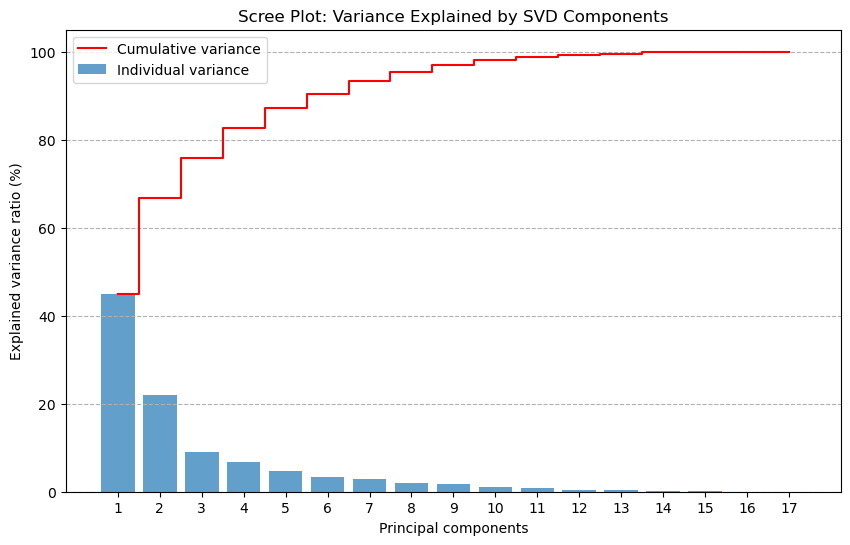

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

total_var = np.sum(explained_variance)
percent_var = (explained_variance / total_var) * 100
cumulative_var = np.cumsum(percent_var)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 18), percent_var, alpha=0.7, align='center', label='Individual variance')
plt.step(range(1, 18), cumulative_var, where='mid', label='Cumulative variance', color='red')
plt.ylabel('Explained variance ratio (%)')
plt.xlabel('Principal components')
plt.title('Scree Plot: Variance Explained by SVD Components')
plt.xticks(range(1, 18))
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--')
plt.savefig('scree_plot.png')

print("Percentages:", percent_var)
print("Cumulative:", cumulative_var)
print("Total Sum:", total_var)

In [156]:
from sklearn. preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(X_train)

X_train_normed = scaler.transform(X_train)
X_test_normed = scaler.transform(X_test)

pca = PCA(n_components = 5)

pca.fit(X_train_normed)

X_train_pca = pca.transform(X_train_normed)

X_test_pca = pca.transform(X_test_normed)

In [173]:
model_knn = KNeighborsRegressor(n_neighbors = 5, p = 2,
                                weights = 'distance')

# Train the model
model_knn.fit(X_train_pca, y_train)

# Let's make a prediction on a test sample
y_pred = model_knn.predict(X_test_pca)

In [174]:
y_test

104    17199.0
90      7099.0
23      7957.0
143     9960.0
171    11549.0
150     5348.0
65     18280.0
114    17075.0
33      6529.0
101    13499.0
189    11595.0
30      6479.0
70     31600.0
172    17669.0
95      7799.0
134    15040.0
106    18399.0
193    12290.0
108    13200.0
163     8058.0
177    11248.0
132    11850.0
68     28248.0
7      18920.0
128    37028.0
89      5499.0
127    34028.0
102    14399.0
84     14489.0
110    13860.0
79      7689.0
100     9549.0
116    17950.0
118     5572.0
10     16430.0
94      7299.0
13     21105.0
42     10345.0
15     30760.0
124    12764.0
200    16845.0
Name: price, dtype: float64

In [175]:
pd.DataFrame(y_pred)

,0
0,16792.433234
1,8112.145457
2,7974.108860
3,9500.303008
4,10511.797315
5,6448.492465
6,14999.757656
7,21511.583879
8,7106.014806
9,16574.650244


In [176]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAX_ERROR: ", max_error(y_test, y_pred))

#print("R2: ", r2_score(y_test, y_pred))
#print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

MSE:  11708442.533349162
MAE:  2400.434767068
MAX_ERROR:  9456.90973228656


In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Создаем пайплайн
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsRegressor())
])

# Параметры для подбора
param_grid = [
    {
        'pca__n_components': [5, 10, 15, 20, 25, 30, None],  # None = все компоненты
        'knn__n_neighbors': [3, 5, 7],
        'knn__weights': ['uniform', 'distance'],
        'knn__p': [1, 2]
    }
]

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # или 'r2'
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший MSE (CV):", -grid_search.best_score_)

# Оценка на тесте
y_pred_best = grid_search.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_pred_best))

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Лучшие параметры: {'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 5}
Лучший MSE (CV): 14377938.26794367
Test MSE: 11708442.533349145


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/p